In [1]:
import pickle

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(list(demo.keys()))

['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-0.0', '262

In [14]:
import numpy as np
import scipy.stats as stats

def corr(x, y, bonf=True):
    mu = np.mean(x, axis=0, keepdims=True)
    x = x - mu
    y = y - np.mean(y)
    # Calculate correlation
    xy = np.einsum('ab,a->b',x,y)
    xx = np.einsum('ab,ab->b',x,x)
    yy = np.einsum('a,a->',y,y)
    rho = xy/(xx*yy)**0.5
    # Sometimes happens with SNPs
    rho[np.isnan(rho)] = 0 
    # Get t distribution
    n = x.shape[0]
    m = x.shape[1]
    df = n-2 
    t = rho*(df/(1-rho**2))**0.5
    t[t < 0] = -t[t < 0]
    # Convert to 2-sided p value
    p = (1-stats.t.cdf(t, df))*2
    # Bonferroni correction
    if bonf:
        p *= m
    p[p > 1] = 1
    p[p < 1e-5] = 1e-5
    return rho, np.log10(p)

print('Done')

Done


In [105]:
field = 'f.23105.diff3-2'
fc = []
y = []

for sub in demo['longitudinal']:
    if sub not in demo[field]:
        continue
    try:
        yp = demo[field][sub]
        p = np.load(f'{demodir}/fc/{sub}_task-20227-3-2-diff_fc.npy')
    except:
        continue
    fc.append(p)
    y.append(yp)

fc = np.stack(fc)
y = np.array(y)

print(fc.shape, y.shape)

(2442, 34716) (2442,)


In [94]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [106]:
bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

def get_net_avg(bounds, net1, net2, diff):
    res = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(bounds[net2], bounds[net2+1])

    for i,v in enumerate(diff):
        m = remap(vec2mat(v))
        c = m[np.ix_(s1,s2)].flatten()
        c = np.mean(c, keepdims=True)
        res.append(c)

    res = np.concatenate(res)
    
    return res

nets = []

for i in range(0,14):
    print(i)
    for j in range(i,14):
        avg = get_net_avg(bounds, i, j, fc)
        nets.append(avg)

nets = np.stack(nets)

print(nets.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
(105, 2442)


[0.87153983 0.41122118 0.58450382 0.62470825 0.93318666 0.65929812
 0.06292663 0.29084672 0.92342406 0.73020699 0.96731741 0.09453425
 0.73430601 0.94815976 0.66413734 0.78647851 0.85332384 0.54008863
 0.97602333 0.04243486 0.10823888 0.87011857 0.84466219 0.2546653
 0.03793152 0.77103476 0.24067924 0.10305183 0.13288051 0.48911941
 0.95777178 0.23052127 0.90392575 0.38268479 0.23620149 0.25460113
 0.57787464 0.28398571 0.3089029  0.38026866 0.87955323 0.49080799
 0.22800588 0.41738503 0.60696818 0.81830656 0.64212873 0.59157673
 0.90658417 0.91953288 0.74592929 0.7683115  0.58942804 0.73555138
 0.79271773 0.58665326 0.69906471 0.63017535 0.54679348 0.69113275
 0.74566802 0.53902752 0.95731963 0.81921443 0.72897144 0.98474757
 0.79946514 0.94419141 0.6564916  0.37978863 0.20525378 0.88676077
 0.56355567 0.35742111 0.1003139  0.56706823 0.31098728 0.63418543
 0.85456333 0.95420596 0.86123783 0.46616738 0.89256209 0.8818981
 0.60005445 0.40501413 0.33581726 0.98363251 0.19998194 0.466823

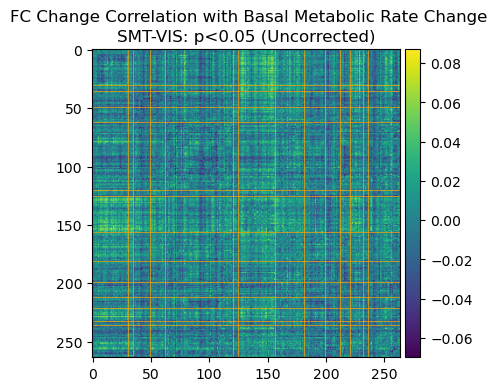

In [110]:
rho, logp = corr(fc, y)
_, lp = corr(nets.T, y, bonf=False)
print(10**lp)

a,b = np.triu_indices(14)
idcs = np.where(lp < -1)[0]
print(a[idcs],b[idcs])

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(1,1,figsize=(6,4))

im = ax.imshow(remap(vec2mat(rho)))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

for a in bounds[1:-1]:
    ax.plot([a,a],[0,263], color='orange', linewidth=0.5)
    ax.plot([0,263],[a,a], color='orange', linewidth=0.5)

fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('SMT-VIS: p<0.05 (Uncorrected)')

fig.suptitle('FC Change Correlation with Basal Metabolic Rate Change')
fig.savefig(f'/home/anton/Documents/Tulane/Research/Work/UKB/long_{field}.pdf')
fig.show()